Frequency distributions in ROOT are handled by a set of classes derived from the histogram class ```TH1```, in our case ```TH1F```. The letter F stands for float, meaning that the data type ```float``` is used to store the entries in one histogram bin.

In [1]:
TCanvas c;
TF1 efunc("efunc","exp([0]+[1]*x)",0.,5.);
efunc.SetParameter(0,1);
efunc.SetParameter(1,-1);

The first lines of this example define a function, an exponential in this case, and set its parameters. 

In [2]:
TH1F h("histogram 1","example histogram",100,0.,5.);

In this line a histogram is instantiated, with a name, a title, a certain number of bins (100 of them, equidistant, equally sized) in the range from 0 to 5.

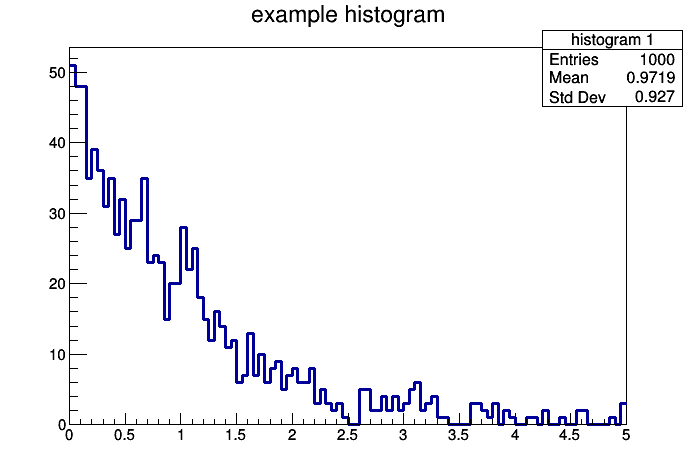

In [3]:
for (int i=0;i<1000;i++) {h.Fill(efunc.GetRandom());}
 h.Draw();
c.Draw();

We use yet another new feature of ROOT to fill this histogram with data, namely pseudo-random numbers generated with the method ```TF1::GetRandom```, which in turn uses an instance of the ROOT class ```TRandom``` created when ROOT is started. Data is entered in the histogram at line 4 using the method ```TH1F::Fill``` in a loop construct. As a result, the histogram is filled with 1000 random numbers distributed according to the defined function. The histogram is displayed using the method ```TH1F::Draw()```. You may think of this example as repeated measurements of the life time of a quantum mechanical state, which are entered into the histogram, thus giving a visual impression of the probability density distribution. The plot is shown above.

Note that you will not obtain an identical plot when executing the lines above, depending on how the random number generator is initialised.

The class ```TH1F``` does not contain a convenient input format from plain text files. The following lines of ```C++``` code do the job. One number per line stored in the text file “expo.dat” is read in via an input stream and filled in the histogram until end of file is reached.

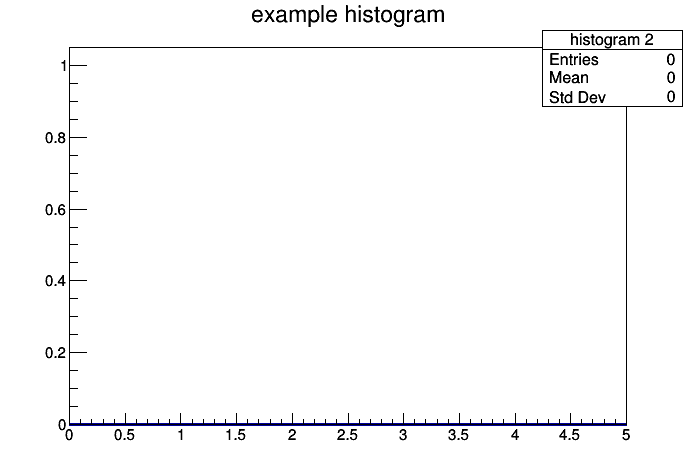

In [4]:
TH1F m("histogram 2","example histogram",100,0.,5.);
ifstream inp; 
double x;
inp.open("expo.dat");
while (inp >> x) { m.Fill(x); }
m.Draw();
inp.close();
c.Draw();